*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [1]:
# Import libraries. You may or may not use all of these.
#!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots
#import tensorflow_docs.modeling

In [2]:
# Import data
#!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
# encode categorical data 
dataset["sex"] = dataset["sex"].astype("category")
dataset["sex_cat"] = dataset["sex"].cat.codes
dataset["smoker"] = dataset["smoker"].astype("category")
dataset["smoker_cat"] = dataset["smoker"].cat.codes
dataset["region"] = dataset["region"].astype("category")
dataset["region_cat"] = dataset["region"].cat.codes

In [4]:
# shuffle data and divide into train and test datasets, and lavels
dataset_drop = dataset.drop(["sex","smoker","region"], axis = 1)
dataset_drop = sklearn.utils.shuffle(dataset_drop)
train_dataset = dataset_drop[:1070]
test_dataset = dataset_drop[1071:]
train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")


In [5]:
# build model and display summary
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [6]:
#train model 
EPOCHS = 500

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=2)

Epoch 1/500
27/27 - 3s - loss: 307294240.0000 - mae: 12939.2246 - mse: 307294240.0000 - val_loss: 325311136.0000 - val_mae: 12824.4639 - val_mse: 325311136.0000
Epoch 2/500
27/27 - 0s - loss: 297137024.0000 - mae: 12571.6709 - mse: 297137024.0000 - val_loss: 309203552.0000 - val_mae: 12225.9844 - val_mse: 309203552.0000
Epoch 3/500
27/27 - 0s - loss: 273482208.0000 - mae: 11674.2461 - mse: 273482208.0000 - val_loss: 277339168.0000 - val_mae: 10954.5166 - val_mse: 277339168.0000
Epoch 4/500
27/27 - 0s - loss: 235759648.0000 - mae: 10105.4473 - mse: 235759648.0000 - val_loss: 232319552.0000 - val_mae: 9182.1230 - val_mse: 232319552.0000
Epoch 5/500
27/27 - 0s - loss: 186134112.0000 - mae: 8237.7402 - mse: 186134112.0000 - val_loss: 183088432.0000 - val_mae: 7731.2080 - val_mse: 183088432.0000
Epoch 6/500
27/27 - 0s - loss: 143428512.0000 - mae: 7427.1479 - mse: 143428512.0000 - val_loss: 150231424.0000 - val_mae: 8431.9951 - val_mse: 150231424.0000
Epoch 7/500
27/27 - 0s - loss: 12452396

Epoch 53/500
27/27 - 0s - loss: 113451968.0000 - mae: 8538.3350 - mse: 113451968.0000 - val_loss: 134871264.0000 - val_mae: 9133.3672 - val_mse: 134871264.0000
Epoch 54/500
27/27 - 0s - loss: 113030056.0000 - mae: 8525.7139 - mse: 113030056.0000 - val_loss: 134538416.0000 - val_mae: 9049.2998 - val_mse: 134538416.0000
Epoch 55/500
27/27 - 0s - loss: 112558376.0000 - mae: 8501.2998 - mse: 112558376.0000 - val_loss: 134129608.0000 - val_mae: 9054.0137 - val_mse: 134129608.0000
Epoch 56/500
27/27 - 0s - loss: 112143368.0000 - mae: 8472.7666 - mse: 112143368.0000 - val_loss: 133705904.0000 - val_mae: 9015.7041 - val_mse: 133705904.0000
Epoch 57/500
27/27 - 0s - loss: 111945808.0000 - mae: 8478.5752 - mse: 111945808.0000 - val_loss: 133341816.0000 - val_mae: 8958.5605 - val_mse: 133341816.0000
Epoch 58/500
27/27 - 0s - loss: 111369760.0000 - mae: 8422.2754 - mse: 111369760.0000 - val_loss: 132780208.0000 - val_mae: 8975.0381 - val_mse: 132780208.0000
Epoch 59/500
27/27 - 0s - loss: 11115549

Epoch 105/500
27/27 - 0s - loss: 41264852.0000 - mae: 4693.7207 - mse: 41264852.0000 - val_loss: 34154616.0000 - val_mae: 4107.3809 - val_mse: 34154616.0000
Epoch 106/500
27/27 - 0s - loss: 40758572.0000 - mae: 4651.2197 - mse: 40758572.0000 - val_loss: 33658460.0000 - val_mae: 3911.4424 - val_mse: 33658460.0000
Epoch 107/500
27/27 - 0s - loss: 40505704.0000 - mae: 4583.1436 - mse: 40505704.0000 - val_loss: 31612896.0000 - val_mae: 4078.5532 - val_mse: 31612900.0000
Epoch 108/500
27/27 - 0s - loss: 40035200.0000 - mae: 4522.0898 - mse: 40035200.0000 - val_loss: 30728546.0000 - val_mae: 4451.5825 - val_mse: 30728546.0000
Epoch 109/500
27/27 - 0s - loss: 39840052.0000 - mae: 4529.4971 - mse: 39840052.0000 - val_loss: 30876114.0000 - val_mae: 3799.3235 - val_mse: 30876114.0000
Epoch 110/500
27/27 - 0s - loss: 39967704.0000 - mae: 4436.2622 - mse: 39967704.0000 - val_loss: 29580466.0000 - val_mae: 4144.7168 - val_mse: 29580466.0000
Epoch 111/500
27/27 - 0s - loss: 39330944.0000 - mae: 4378

Epoch 158/500
27/27 - 0s - loss: 35947684.0000 - mae: 4021.2205 - mse: 35947684.0000 - val_loss: 25625084.0000 - val_mae: 2881.8972 - val_mse: 25625084.0000
Epoch 159/500
27/27 - 0s - loss: 35710972.0000 - mae: 3913.0620 - mse: 35710972.0000 - val_loss: 22747176.0000 - val_mae: 3368.9524 - val_mse: 22747176.0000
Epoch 160/500
27/27 - 0s - loss: 35441136.0000 - mae: 3883.6313 - mse: 35441136.0000 - val_loss: 23054336.0000 - val_mae: 3618.4392 - val_mse: 23054336.0000
Epoch 161/500
27/27 - 0s - loss: 35579680.0000 - mae: 3964.0813 - mse: 35579680.0000 - val_loss: 23672702.0000 - val_mae: 3207.1169 - val_mse: 23672702.0000
Epoch 162/500
27/27 - 0s - loss: 35509420.0000 - mae: 3919.3174 - mse: 35509420.0000 - val_loss: 24188738.0000 - val_mae: 3103.9104 - val_mse: 24188738.0000
Epoch 163/500
27/27 - 0s - loss: 35444488.0000 - mae: 3956.4399 - mse: 35444488.0000 - val_loss: 23406460.0000 - val_mae: 3085.2380 - val_mse: 23406460.0000
Epoch 164/500
27/27 - 0s - loss: 35433492.0000 - mae: 3919

Epoch 211/500
27/27 - 0s - loss: 32722532.0000 - mae: 3699.8821 - mse: 32722532.0000 - val_loss: 21029960.0000 - val_mae: 2715.0503 - val_mse: 21029960.0000
Epoch 212/500
27/27 - 0s - loss: 32748322.0000 - mae: 3720.5408 - mse: 32748322.0000 - val_loss: 20191278.0000 - val_mae: 2827.2034 - val_mse: 20191278.0000
Epoch 213/500
27/27 - 0s - loss: 32676666.0000 - mae: 3663.2422 - mse: 32676666.0000 - val_loss: 20034312.0000 - val_mae: 3177.6360 - val_mse: 20034312.0000
Epoch 214/500
27/27 - 0s - loss: 32774148.0000 - mae: 3717.1567 - mse: 32774148.0000 - val_loss: 19701586.0000 - val_mae: 3147.6304 - val_mse: 19701586.0000
Epoch 215/500
27/27 - 0s - loss: 32728124.0000 - mae: 3696.7227 - mse: 32728124.0000 - val_loss: 20025934.0000 - val_mae: 3034.3508 - val_mse: 20025934.0000
Epoch 216/500
27/27 - 0s - loss: 32649236.0000 - mae: 3720.6592 - mse: 32649236.0000 - val_loss: 21080306.0000 - val_mae: 2705.2295 - val_mse: 21080306.0000
Epoch 217/500
27/27 - 0s - loss: 32535538.0000 - mae: 3666

Epoch 264/500
27/27 - 0s - loss: 30718792.0000 - mae: 3519.7617 - mse: 30718792.0000 - val_loss: 18102560.0000 - val_mae: 2883.5090 - val_mse: 18102560.0000
Epoch 265/500
27/27 - 0s - loss: 30506662.0000 - mae: 3485.7024 - mse: 30506662.0000 - val_loss: 18884486.0000 - val_mae: 3443.7400 - val_mse: 18884486.0000
Epoch 266/500
27/27 - 0s - loss: 30583054.0000 - mae: 3617.9768 - mse: 30583054.0000 - val_loss: 18316086.0000 - val_mae: 2618.8606 - val_mse: 18316086.0000
Epoch 267/500
27/27 - 0s - loss: 30852744.0000 - mae: 3546.4714 - mse: 30852744.0000 - val_loss: 17389630.0000 - val_mae: 2808.7949 - val_mse: 17389630.0000
Epoch 268/500
27/27 - 0s - loss: 30393736.0000 - mae: 3552.2832 - mse: 30393736.0000 - val_loss: 17487222.0000 - val_mae: 2709.6284 - val_mse: 17487222.0000
Epoch 269/500
27/27 - 0s - loss: 30680748.0000 - mae: 3513.5671 - mse: 30680748.0000 - val_loss: 17927724.0000 - val_mae: 2904.6177 - val_mse: 17927724.0000
Epoch 270/500
27/27 - 0s - loss: 30325118.0000 - mae: 3539

Epoch 317/500
27/27 - 0s - loss: 29154474.0000 - mae: 3361.3342 - mse: 29154474.0000 - val_loss: 16513500.0000 - val_mae: 2699.9255 - val_mse: 16513500.0000
Epoch 318/500
27/27 - 0s - loss: 29234674.0000 - mae: 3397.6707 - mse: 29234674.0000 - val_loss: 17039802.0000 - val_mae: 3250.7920 - val_mse: 17039802.0000
Epoch 319/500
27/27 - 0s - loss: 29258250.0000 - mae: 3481.3574 - mse: 29258250.0000 - val_loss: 15644843.0000 - val_mae: 2760.8250 - val_mse: 15644843.0000
Epoch 320/500
27/27 - 0s - loss: 28836458.0000 - mae: 3341.9578 - mse: 28836458.0000 - val_loss: 16148359.0000 - val_mae: 2969.9856 - val_mse: 16148359.0000
Epoch 321/500
27/27 - 0s - loss: 29094448.0000 - mae: 3397.6165 - mse: 29094448.0000 - val_loss: 17552334.0000 - val_mae: 3400.0210 - val_mse: 17552334.0000
Epoch 322/500
27/27 - 0s - loss: 29018078.0000 - mae: 3446.4541 - mse: 29018078.0000 - val_loss: 15790163.0000 - val_mae: 2912.0107 - val_mse: 15790163.0000
Epoch 323/500
27/27 - 0s - loss: 28927918.0000 - mae: 3414

Epoch 370/500
27/27 - 0s - loss: 27544880.0000 - mae: 3291.9023 - mse: 27544880.0000 - val_loss: 13843670.0000 - val_mae: 2374.0486 - val_mse: 13843670.0000
Epoch 371/500
27/27 - 0s - loss: 27472742.0000 - mae: 3253.7698 - mse: 27472742.0000 - val_loss: 15834707.0000 - val_mae: 3189.5322 - val_mse: 15834707.0000
Epoch 372/500
27/27 - 0s - loss: 27678664.0000 - mae: 3296.3096 - mse: 27678664.0000 - val_loss: 15035250.0000 - val_mae: 3026.0605 - val_mse: 15035250.0000
Epoch 373/500
27/27 - 0s - loss: 27781282.0000 - mae: 3328.2095 - mse: 27781282.0000 - val_loss: 13784261.0000 - val_mae: 2369.8711 - val_mse: 13784261.0000
Epoch 374/500
27/27 - 0s - loss: 27281678.0000 - mae: 3280.1038 - mse: 27281678.0000 - val_loss: 13990402.0000 - val_mae: 2467.9763 - val_mse: 13990402.0000
Epoch 375/500
27/27 - 0s - loss: 27520960.0000 - mae: 3270.1208 - mse: 27520960.0000 - val_loss: 13619645.0000 - val_mae: 2454.0991 - val_mse: 13619645.0000
Epoch 376/500
27/27 - 0s - loss: 27443134.0000 - mae: 3255

Epoch 423/500
27/27 - 0s - loss: 26185886.0000 - mae: 3135.8657 - mse: 26185886.0000 - val_loss: 13320004.0000 - val_mae: 2771.3306 - val_mse: 13320004.0000
Epoch 424/500
27/27 - 0s - loss: 25960910.0000 - mae: 3160.3835 - mse: 25960910.0000 - val_loss: 13449901.0000 - val_mae: 2080.5571 - val_mse: 13449901.0000
Epoch 425/500
27/27 - 0s - loss: 25829282.0000 - mae: 3137.9299 - mse: 25829282.0000 - val_loss: 12824325.0000 - val_mae: 2000.3204 - val_mse: 12824325.0000
Epoch 426/500
27/27 - 0s - loss: 25982744.0000 - mae: 3117.5281 - mse: 25982744.0000 - val_loss: 13304978.0000 - val_mae: 2221.1440 - val_mse: 13304978.0000
Epoch 427/500
27/27 - 0s - loss: 26027488.0000 - mae: 3149.2498 - mse: 26027488.0000 - val_loss: 12240467.0000 - val_mae: 2144.2327 - val_mse: 12240467.0000
Epoch 428/500
27/27 - 0s - loss: 25925184.0000 - mae: 3133.3464 - mse: 25925184.0000 - val_loss: 12618175.0000 - val_mae: 2185.3352 - val_mse: 12618175.0000
Epoch 429/500
27/27 - 0s - loss: 25997958.0000 - mae: 3106

Epoch 476/500
27/27 - 0s - loss: 24996596.0000 - mae: 3040.4065 - mse: 24996596.0000 - val_loss: 11879906.0000 - val_mae: 2483.2112 - val_mse: 11879906.0000
Epoch 477/500
27/27 - 0s - loss: 24643518.0000 - mae: 3008.9392 - mse: 24643518.0000 - val_loss: 11165226.0000 - val_mae: 2181.2810 - val_mse: 11165226.0000
Epoch 478/500
27/27 - 0s - loss: 24326668.0000 - mae: 2976.9861 - mse: 24326668.0000 - val_loss: 11628415.0000 - val_mae: 2337.4541 - val_mse: 11628415.0000
Epoch 479/500
27/27 - 0s - loss: 24541694.0000 - mae: 2934.4578 - mse: 24541694.0000 - val_loss: 12535978.0000 - val_mae: 2688.7114 - val_mse: 12535978.0000
Epoch 480/500
27/27 - 0s - loss: 24648594.0000 - mae: 3054.6543 - mse: 24648594.0000 - val_loss: 11174284.0000 - val_mae: 2283.6843 - val_mse: 11174284.0000
Epoch 481/500
27/27 - 0s - loss: 24587926.0000 - mae: 2992.3479 - mse: 24587926.0000 - val_loss: 11820289.0000 - val_mae: 2159.9773 - val_mse: 11820289.0000
Epoch 482/500
27/27 - 0s - loss: 24785864.0000 - mae: 3012

In [7]:
# training progress
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,24385836.0,2923.375488,24385836.0,11815131.0,2641.627930,11815131.0,495
496,24106678.0,2986.041992,24106678.0,11182251.0,2392.164795,11182251.0,496
497,24366274.0,3002.655762,24366274.0,10995523.0,2044.731567,10995523.0,497
498,24262326.0,2886.310791,24262326.0,12607839.0,2634.664062,12607839.0,498
499,24128044.0,2960.452637,24128044.0,12288391.0,2331.964355,12288391.0,499


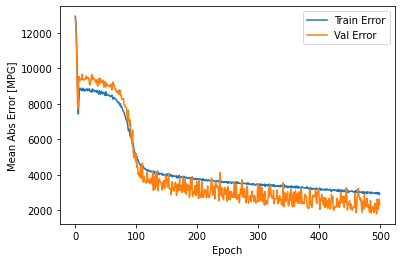

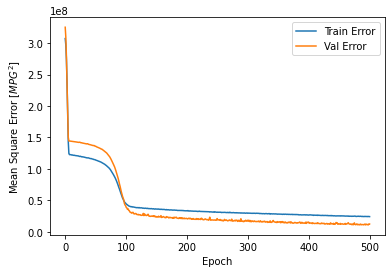

In [8]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'],
         label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],
         label = 'Val Error')
plt.legend()

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [$MPG^2$]')
plt.plot(hist['epoch'], hist['mse'],
         label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'],
         label = 'Val Error')
plt.legend()
plt.show()


9/9 - 0s - loss: 30852516.0000 - mae: 3182.8267 - mse: 30852516.0000
Testing set Mean Abs Error: 3182.83 expenses
You passed the challenge. Great job!


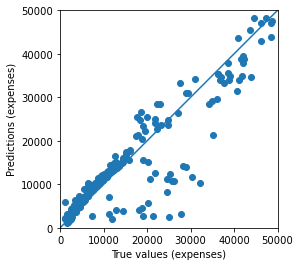

In [9]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
